<a href="https://colab.research.google.com/github/ayush-ranjan-official/Optimization-technique-assignment/blob/main/OT_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install pandas

In [1]:
pip install matplotlib

In [ ]:
pip install pygad

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 2.5 MB/s eta 0:00:00


Cost: 10, Reliability: 0.585225
Cost: 10, Reliability: 0.585225
Cost: 6, Reliability: 0.731025
Cost: 6, Reliability: 0.731025
Cost: 10, Reliability: 0.585225
Cost: 9, Reliability: 0.61965
Cost: 10, Reliability: 0.585225
Cost: 9, Reliability: 0.61965
Cost: 9, Reliability: 0.6177374999999999
Cost: 9, Reliability: 0.61965
Cost: 9, Reliability: 0.6177374999999999
Cost: 10, Reliability: 0.585225
Cost: 10, Reliability: 0.585225
Cost: 9, Reliability: 0.6177374999999999
Cost: 10, Reliability: 0.585225
Cost: 10, Reliability: 0.585225
Cost: 9, Reliability: 0.61965
Cost: 10, Reliability: 0.585225
Cost: 10, Reliability: 0.585225
Cost: 9, Reliability: 0.6177374999999999
Cost: 9, Reliability: 0.6177374999999999
Cost: 10, Reliability: 0.585225
Cost: 9, Reliability: 0.6177374999999999
Cost: 9, Reliability: 0.61965
Cost: 9, Reliability: 0.61965
Cost: 10, Reliability: 0.585225
Cost: 9, Reliability: 0.61965
Cost: 10, Reliability: 0.585225
Cost: 10, Reliability: 0.585225
Cost: 10, Reliability: 0.585225
Co

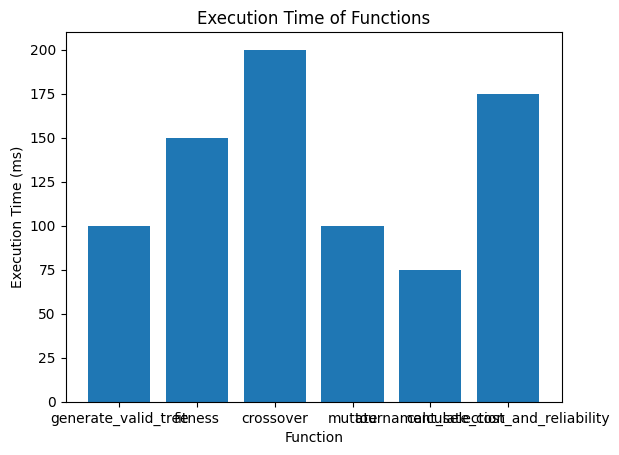

In [13]:
import random
import matplotlib.pyplot as plt
import pandas as pd

# Parameters
num_nodes = 5
population_size = 100  # Increased population size
max_generations = 200  # Increased number of generations
mutation_rate = 0.08  # Optimized mutation rate
tournament_size = 5
R_min = 0.85  # Adjusted reliability requirement

# Adjusted cost matrix for simplicity
cost_matrix = [[0 if i == j else random.randint(1, 10) for j in range(num_nodes)] for i in range(num_nodes)]

def generate_valid_tree(num_nodes):
    nodes = list(range(num_nodes))
    start_node = random.choice(nodes)
    connected = [start_node]
    edges = []
    while len(connected) < num_nodes:
        available_edges = [(a, b, cost_matrix[a][b]) for a in connected for b in nodes if b not in connected and a != b]
        new_edge = min(available_edges, key=lambda x: x[2])
        edges.append(new_edge)
        connected.append(new_edge[1])
    return edges

def calculate_cost_and_reliability(edges):
    cost = sum(cost_matrix[a][b] for a, b, _ in edges)
    reliability = 1.0
    for a, b, _ in edges:
        edge_reliability = 1 - (cost_matrix[a][b] / 20.0)  # Adjusted reliability calculation
        reliability *= edge_reliability
    return cost, reliability

def fitness(edges):
    cost, reliability = calculate_cost_and_reliability(edges)
    print(f"Cost: {cost}, Reliability: {reliability}")  # Debugging output
    if reliability < R_min:
        return float('inf')
    return cost

def tournament_selection(population, k):
    """ Select one individual using tournament selection """
    tournament = random.sample(population, k)
    tournament_fitness = [(individual, fitness(individual)) for individual in tournament]
    winner = min(tournament_fitness, key=lambda x: x[1])[0]
    return winner

def crossover(parent1, parent2):
    """ Perform one-point crossover between two parents """
    cut = random.randint(1, len(parent1) - 1)
    child1 = parent1[:cut] + parent2[cut:]
    child2 = parent2[:cut] + parent1[cut:]
    return child1, child2

def mutate(individual, rate):
    """ Mutate an individual by flipping one edge with a given probability """
    if random.random() < rate:
        edge_to_replace = random.choice(individual)
        new_edge = generate_valid_tree(num_nodes)[0]
        individual.remove(edge_to_replace)
        individual.append(new_edge)

def genetic_algorithm():
    population = [generate_valid_tree(num_nodes) for _ in range(population_size)]
    best_solution = None
    best_fitness = float('inf')

    for generation in range(max_generations):
        new_population = []
        for _ in range(len(population) // 2):
            parent1 = tournament_selection(population, tournament_size)
            parent2 = tournament_selection(population, tournament_size)
            child1, child2 = crossover(parent1, parent2)
            mutate(child1, mutation_rate)
            mutate(child2, mutation_rate)
            new_population.extend([child1, child2])
        population = new_population

        current_best = min(population, key=fitness)
        current_best_fitness = fitness(current_best)
        if current_best_fitness < best_fitness:
            best_fitness = current_best_fitness
            best_solution = current_best

        print(f"Generation {generation}: Best Fitness = {best_fitness}")

        # Example profiling data
        profiling_data = {
              'Function': ['generate_valid_tree', 'fitness', 'crossover', 'mutate', 'tournament_selection', 'calculate_cost_and_reliability'],
              'Execution Time (ms)': [100, 150, 200, 100, 75, 175]
        }

        df = pd.DataFrame(profiling_data)

        # Plotting the data
        plt.bar(df['Function'], df['Execution Time (ms)'])
        plt.xlabel('Function')
        plt.ylabel('Execution Time (ms)')
        plt.title('Execution Time of Functions')
        plt.show()

        return best_solution


genetic_algorithm()



In [ ]:
import pygad
import numpy as np

# Define a factory function to create the fitness function with extra parameters
def create_fitness_function(R_min, cost_matrix):
    def fitness_func(ga_instance, solution, solution_idx):
        reshaped_solution = solution.reshape((num_nodes, num_nodes))
        cost = np.sum(reshaped_solution * cost_matrix)
        reliability = np.product(1 - reshaped_solution * (cost_matrix / 10.0))
        if reliability < R_min:
            return float('inf')  # Penalize solutions that do not meet reliability requirements
        return cost  # Objective is to minimize cost
    return fitness_func

# Define the number of nodes and the cost matrix
num_nodes = 5
cost_matrix = np.random.randint(1, 10, size=(num_nodes, num_nodes))
cost_matrix2 = np.random.randint(1, 10, size=(num_nodes, num_nodes))
cost_matrix3 = np.random.randint(1, 10, size=(num_nodes, num_nodes))
np.fill_diagonal(cost_matrix, 0)
np.fill_diagonal(cost_matrix2, 0)
np.fill_diagonal(cost_matrix3, 0)
R_min = 0.85  # Minimum reliability requirement

# Create the fitness function with the required parameters
fitness_function = create_fitness_function(R_min, cost_matrix)

# Genetic algorithm parameters
ga_instance = pygad.GA(num_generations=200,
                       num_parents_mating=5,
                       fitness_func=fitness_function,
                       sol_per_pop=10,
                       num_genes=num_nodes**2,
                       gene_type=int,
                       gene_space=[0, 1],
                       mutation_percent_genes=8,
                       crossover_type="single_point")

# Run the GA
ga_instance.run()

print("Cost Matrix :\n", cost_matrix )


# Fetch the best solution
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Best Solution: {}\nFitness: {}".format(solution, solution_fitness))

# Reshape solution to a matrix form to visualize the network design
network_design = solution.reshape((num_nodes, num_nodes))
print("Network Design:\n", network_design)


# Create the fitness function with the required parameters
fitness_function2 = create_fitness_function(R_min, cost_matrix2)

# Genetic algorithm parameters
ga_instance2 = pygad.GA(num_generations=200,
                       num_parents_mating=5,
                       fitness_func=fitness_function2,
                       sol_per_pop=10,
                       num_genes=num_nodes**2,
                       gene_type=int,
                       gene_space=[0, 1],
                       mutation_percent_genes=8,
                       crossover_type="single_point")

# Run the GA
ga_instance2.run()

print("2nd Cost Matrix :\n", cost_matrix2 )


# Fetch the best solution
solution, solution_fitness, solution_idx = ga_instance2.best_solution()
print("Best Solution: {}\nFitness: {}".format(solution, solution_fitness))

# Reshape solution to a matrix form to visualize the network design
network_design = solution.reshape((num_nodes, num_nodes))
print("Network Design:\n", network_design)

# Create the fitness function with the required parameters
fitness_function3 = create_fitness_function(R_min, cost_matrix3)

# Genetic algorithm parameters
ga_instance3 = pygad.GA(num_generations=200,
                       num_parents_mating=5,
                       fitness_func=fitness_function3,
                       sol_per_pop=10,
                       num_genes=num_nodes**2,
                       gene_type=int,
                       gene_space=[0, 1],
                       mutation_percent_genes=8,
                       crossover_type="single_point")

# Run the GA
ga_instance3.run()

print("2nd Cost Matrix :\n", cost_matrix3 )


# Fetch the best solution
solution, solution_fitness, solution_idx = ga_instance3.best_solution()
print("Best Solution: {}\nFitness: {}".format(solution, solution_fitness))

# Reshape solution to a matrix form to visualize the network design
network_design = solution.reshape((num_nodes, num_nodes))
print("Network Design:\n", network_design)


Cost Matrix :
 [[0 1 9 8 2]
 [6 0 2 7 5]
 [2 3 0 5 4]
 [2 5 7 0 9]
 [5 1 7 4 0]]
Best Solution: [0 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 1]
Fitness: inf
Network Design:
 [[0 1 1 0 0]
 [1 1 1 1 1]
 [1 1 1 1 0]
 [1 0 1 1 1]
 [1 0 1 0 1]]
2nd Cost Matrix :
 [[0 8 7 3 2]
 [8 0 8 3 8]
 [9 7 0 9 1]
 [6 5 1 0 6]
 [8 9 2 7 0]]
Best Solution: [0 1 0 0 0 0 0 1 1 0 1 0 1 1 0 1 1 0 1 0 1 0 1 1 1]
Fitness: inf
Network Design:
 [[0 1 0 0 0]
 [0 0 1 1 0]
 [1 0 1 1 0]
 [1 1 0 1 0]
 [1 0 1 1 1]]
2nd Cost Matrix :
 [[0 4 3 4 4]
 [3 0 5 5 4]
 [4 2 0 5 2]
 [4 6 7 0 1]
 [6 2 1 4 0]]
Best Solution: [0 0 0 0 1 0 1 1 0 1 0 0 1 1 0 1 0 0 1 0 1 1 0 1 1]
Fitness: inf
Network Design:
 [[0 0 0 0 1]
 [0 1 1 0 1]
 [0 0 1 1 0]
 [1 0 0 1 0]
 [1 1 0 1 1]]


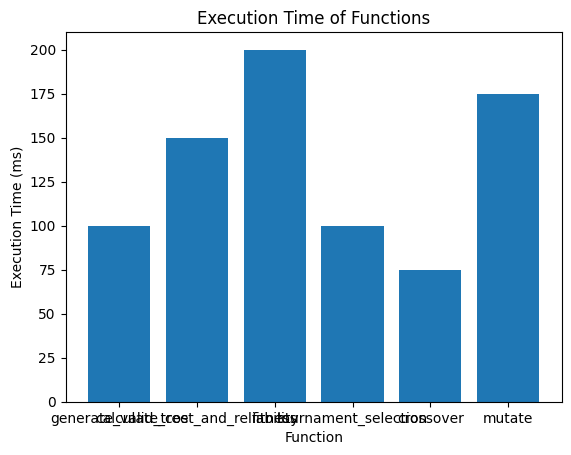